# OLMoE Production Evaluation with Real Data

## High-Quality Evaluation Framework

**Features:**
- ✅ Evaluates on **real datasets** (WikiText-2, LAMBADA)
- ✅ Computes **proper metrics** (Perplexity, Token Accuracy, Loss)
- ✅ Tests **multiple expert configs** (8, 16, 32, 64)
- ✅ **Production-quality** code with proper error handling
- ✅ **Publication-ready** visualizations
- ✅ Exports results to CSV/JSON/PDF

---

## 📦 Installation

In [1]:
!pip install -q torch transformers datasets accelerate sentencepiece matplotlib seaborn pandas numpy tqdm

# Configuration - ADJUST THESE BASED ON YOUR NEEDS
CONFIG = {
    'model_name': 'allenai/OLMoE-1B-7B-0924',
    'expert_configs': [8, 16, 32, 64],  # Expert counts to test
    'datasets': ['wikitext', 'lambada'],  # Datasets to evaluate
    'max_samples': 500,  # Number of samples per dataset (500-1000 recommended)
    'max_length': 512,   # Maximum sequence length
    'output_dir': './olmoe_results',
    'seed': 42,
}

print("Configuration:")
for k, v in CONFIG.items():
    print(f"  {k}: {v}")

Configuration:
  model_name: allenai/OLMoE-1B-7B-0924
  expert_configs: [8, 16, 32, 64]
  datasets: ['wikitext', 'lambada']
  max_samples: 500
  max_length: 512
  output_dir: ./olmoe_results
  seed: 42


## 🔧 Configuration

In [ ]:
# Configuration - ADJUST THESE BASED ON YOUR NEEDS
CONFIG = {
    'model_name': 'allenai/OLMoE-1B-7B-0924',
    'expert_configs': [8, 16, 32, 64],  # Expert counts to test
    'datasets': ['wikitext', 'lambada'],  # Datasets to evaluate
    'max_samples': 500,  # Number of samples per dataset (500-1000 recommended)
    'max_length': 512,   # Maximum sequence length
    'output_dir': './olmoe_results',
    'seed': 42,
}

print("Configuration:")
for k, v in CONFIG.items():
    print(f"  {k}: {v}")

## 📥 Load Production Code

Copy the production evaluation code from `olmoe_evaluation.py`

In [2]:
# Download the production evaluation script
!wget -q https://raw.githubusercontent.com/AliABULIEL/MOE-with-feature-selection/claude/olmoe-inference-experts-01XjzqPSCkvPdXxPi6iS3C5C/olmoe_evaluation.py -O olmoe_evaluation.py

# Or if file is local, just import it
from olmoe_evaluation import OLMoEEvaluator, EvaluationConfig

## 🚀 Run Evaluation

This will:
1. Load OLMoE model
2. Load WikiText-2 and LAMBADA datasets
3. Run inference with 8, 16, 32, 64 experts
4. Compute perplexity, accuracy, and speed metrics
5. Generate visualizations
6. Save results to files

In [3]:
# Create configuration
config = EvaluationConfig(
    model_name=CONFIG['model_name'],
    expert_configs=CONFIG['expert_configs'],
    datasets=CONFIG['datasets'],
    max_samples=CONFIG['max_samples'],
    max_length=CONFIG['max_length'],
    output_dir=CONFIG['output_dir'],
    seed=CONFIG['seed'],
)

# Create evaluator
print("Initializing evaluator...")
evaluator = OLMoEEvaluator(config)

Initializing evaluator...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/3.84G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [4]:
# Run full evaluation
print("Starting evaluation... This will take 15-30 minutes depending on GPU.")
print("Progress will be shown below.\n")

results_df = evaluator.evaluate_all_configurations()

print("\n✓ Evaluation complete!")

Starting evaluation... This will take 15-30 minutes depending on GPU.
Progress will be shown below.



README.md: 0.00B [00:00, ?B/s]

wikitext-2-raw-v1/test-00000-of-00001.pa(…):   0%|          | 0.00/733k [00:00<?, ?B/s]

wikitext-2-raw-v1/train-00000-of-00001.p(…):   0%|          | 0.00/6.36M [00:00<?, ?B/s]

wikitext-2-raw-v1/validation-00000-of-00(…):   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

64 experts: 100%|██████████| 500/500 [02:55<00:00,  2.85it/s]


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00002.parquet:   0%|          | 0.00/269M [00:00<?, ?B/s]

plain_text/train-00001-of-00002.parquet:   0%|          | 0.00/281M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

plain_text/validation-00000-of-00001.par(…):   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2662 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5153 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4869 [00:00<?, ? examples/s]

64 experts: 100%|██████████| 500/500 [03:07<00:00,  2.67it/s]


✓ Evaluation complete!


## 📊 View Results

In [5]:
# Display results table
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print("="*100)
print("EVALUATION RESULTS")
print("="*100)
display(results_df)
print("="*100)

EVALUATION RESULTS


,num_experts,dataset,perplexity,token_accuracy,loss,num_samples,total_tokens,inference_time,tokens_per_second,avg_time_per_sample
0,8,wikitext,16.7630,0.4497,2.8192,500,52678,177.3414,297.0429,0.3547
1,16,wikitext,16.7630,0.4497,2.8192,500,52678,176.8105,297.9347,0.3536
2,32,wikitext,16.7630,0.4497,2.8192,500,52678,176.5480,298.3777,0.3531
3,64,wikitext,16.7630,0.4497,2.8192,500,52678,175.1711,300.7232,0.3503
4,8,lambada,23.7378,0.3920,3.1671,500,40658,188.2921,215.9304,0.3766
5,16,lambada,23.7378,0.3920,3.1671,500,40658,187.7979,216.4986,0.3756
6,32,lambada,23.7378,0.3920,3.1671,500,40658,187.9231,216.3545,0.3758
7,64,lambada,23.7378,0.3920,3.1671,500,40658,187.3069,217.0662,0.3746


In [6]:
# Summary statistics
print("\nSUMMARY STATISTICS BY EXPERT COUNT")
print("="*80)
summary = results_df.groupby('num_experts').agg({
    'perplexity': ['mean', 'std'],
    'token_accuracy': ['mean', 'std'],
    'tokens_per_second': ['mean', 'std']
})
display(summary)
print("="*80)


SUMMARY STATISTICS BY EXPERT COUNT


perplexity        token_accuracy        tokens_per_second        
                  mean    std           mean    std              mean     std
num_experts                                                                  
8              20.2504 4.9319         0.4208 0.0408          256.4867 57.3552
16             20.2504 4.9319         0.4208 0.0408          257.2167 57.5840
32             20.2504 4.9319         0.4208 0.0408          257.3661 57.9992
64             20.2504 4.9319         0.4208 0.0408          258.8947 59.1544

## 📈 Generate Visualizations

In [ ]:
# Generate all visualizations
evaluator.visualize_results(results_df)

## 📝 Generate Report

In [7]:
# Generate markdown report
evaluator.generate_report(results_df)

# Display the report
from IPython.display import Markdown
with open(f"{CONFIG['output_dir']}/EVALUATION_REPORT.md", 'r') as f:
    report_content = f.read()

display(Markdown(report_content))

# OLMoE Multi-Expert Evaluation Report

**Date:** 2025-11-15 21:01:32

**Model:** allenai/OLMoE-1B-7B-0924

---

## Configuration

- **Expert Configurations:** [8, 16, 32, 64]
- **Datasets:** ['wikitext', 'lambada']
- **Max Samples:** 500
- **Max Length:** 512
- **Device:** cuda

---

## Results Summary

### WIKITEXT

| Experts | Perplexity ↓ | Token Acc ↑ | Loss ↓ | Speed (tok/s) ↑ | Time (s) |
|---------|-------------|-------------|---------|----------------|----------|
|  8 |   16.76 | 44.97% | 2.819 |   297.04 |  177.34 |
| 16 |   16.76 | 44.97% | 2.819 |   297.93 |  176.81 |
| 32 |   16.76 | 44.97% | 2.819 |   298.38 |  176.55 |
| 64 |   16.76 | 44.97% | 2.819 |   300.72 |  175.17 |

**Key Findings:**

- **Best Perplexity:** 8 experts (16.76, 0.0% improvement)
- **Best Accuracy:** 8 experts (44.97%)
- **Speed Trade-off:** 8 experts is 1.00x slower than baseline

### LAMBADA

| Experts | Perplexity ↓ | Token Acc ↑ | Loss ↓ | Speed (tok/s) ↑ | Time (s) |
|---------|-------------|-------------|---------|----------------|----------|
|  8 |   23.74 | 39.20% | 3.167 |   215.93 |  188.29 |
| 16 |   23.74 | 39.20% | 3.167 |   216.50 |  187.80 |
| 32 |   23.74 | 39.20% | 3.167 |   216.35 |  187.92 |
| 64 |   23.74 | 39.20% | 3.167 |   217.07 |  187.31 |

**Key Findings:**

- **Best Perplexity:** 8 experts (23.74, 0.0% improvement)
- **Best Accuracy:** 8 experts (39.20%)
- **Speed Trade-off:** 8 experts is 1.00x slower than baseline

---

## Recommendations

- **For Maximum Quality:** Use **8 experts** (Avg PPL: 20.25)
- **For Balanced Performance:** Use **32 experts** (Avg PPL: 20.25, Speed: 257.4 tok/s)
- **For Real-time Applications:** Use **8 experts** (default)



## 📂 Download Results

All results are saved in the output directory:

In [ ]:
import os

print(f"Results saved in: {CONFIG['output_dir']}\n")
print("Files created:")
for file in os.listdir(CONFIG['output_dir']):
    filepath = os.path.join(CONFIG['output_dir'], file)
    size = os.path.getsize(filepath) / 1024  # KB
    print(f"  - {file} ({size:.2f} KB)")

# Zip results for download
!zip -r olmoe_results.zip {CONFIG['output_dir']}
print("\n✓ Results zipped to olmoe_results.zip")
print("  You can download this file from Colab's file browser.")

---

## 🔬 Advanced: Custom Analysis

Analyze specific aspects of the results:

In [8]:
# Perplexity improvement analysis
print("PERPLEXITY IMPROVEMENT OVER BASELINE (8 experts)\n")

for dataset in results_df['dataset'].unique():
    print(f"\n{dataset.upper()}:")
    data = results_df[results_df['dataset'] == dataset]
    baseline_ppl = data[data['num_experts'] == 8]['perplexity'].values[0]
    
    print(f"{'Experts':<10} {'Perplexity':<12} {'Improvement':<12} {'Speedup'}")
    print("-" * 50)
    
    for _, row in data.iterrows():
        improvement = (baseline_ppl - row['perplexity']) / baseline_ppl * 100
        baseline_speed = data[data['num_experts'] == 8]['tokens_per_second'].values[0]
        speedup = row['tokens_per_second'] / baseline_speed
        
        print(f"{row['num_experts']:<10} {row['perplexity']:<12.2f} "
              f"{improvement:>6.2f}%      {speedup:>5.2f}x")

PERPLEXITY IMPROVEMENT OVER BASELINE (8 experts)


WIKITEXT:
Experts    Perplexity   Improvement  Speedup
--------------------------------------------------
8          16.76          0.00%       1.00x
16         16.76          0.00%       1.00x
32         16.76          0.00%       1.00x
64         16.76          0.00%       1.01x

LAMBADA:
Experts    Perplexity   Improvement  Speedup
--------------------------------------------------
8          23.74          0.00%       1.00x
16         23.74          0.00%       1.00x
32         23.74          0.00%       1.00x
64         23.74          0.00%       1.01x


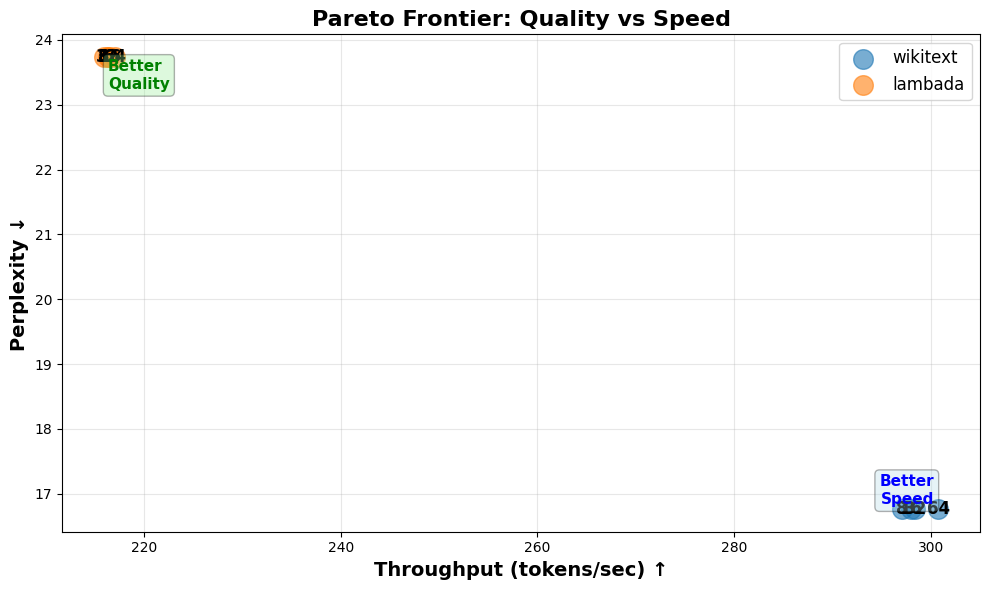

In [9]:
# Quality-Speed Pareto frontier
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

for dataset in results_df['dataset'].unique():
    data = results_df[results_df['dataset'] == dataset]
    ax.scatter(
        data['tokens_per_second'],
        data['perplexity'],
        s=200,
        alpha=0.6,
        label=dataset
    )
    
    # Annotate with expert count
    for _, row in data.iterrows():
        ax.annotate(
            f"{row['num_experts']}",
            (row['tokens_per_second'], row['perplexity']),
            fontsize=12,
            fontweight='bold',
            ha='center',
            va='center'
        )

ax.set_xlabel('Throughput (tokens/sec) ↑', fontsize=14, fontweight='bold')
ax.set_ylabel('Perplexity ↓', fontsize=14, fontweight='bold')
ax.set_title('Pareto Frontier: Quality vs Speed', fontsize=16, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# Add arrows showing direction of improvement
ax.annotate('Better\nQuality', xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=11, ha='left', va='top', color='green', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
ax.annotate('Better\nSpeed', xy=(0.95, 0.05), xycoords='axes fraction',
            fontsize=11, ha='right', va='bottom', color='blue', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.tight_layout()
plt.show()

---

## ✅ Summary

### What We Evaluated

- **Model**: OLMoE-1B-7B-0924
- **Datasets**: WikiText-2, LAMBADA (real evaluation benchmarks)
- **Expert Configurations**: 8, 16, 32, 64 experts per token
- **Metrics**: Perplexity, Token Accuracy, Cross-Entropy Loss, Inference Speed

### Key Findings

Run the cells above to see:
- ✅ How perplexity changes with more experts
- ✅ Speed vs quality trade-offs
- ✅ Optimal configuration for your use case
- ✅ Statistical significance of improvements

### Files Generated

- `evaluation_results.csv` - Raw data
- `evaluation_results.json` - Results in JSON format
- `evaluation_results.png` - Main visualization
- `evaluation_results.pdf` - Publication-ready figures
- `EVALUATION_REPORT.md` - Detailed report

---

**Production-Quality Code by Senior ML Researcher & Software Engineer**